<a href="https://colab.research.google.com/github/desmondg19/CLPSProject2/blob/main/RI_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To do: fix correlation plots, choropleth, income data w/ covid data, voting results?? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#Read dataset Summary of Rhode Island Covid Data
Download_Data= drive.CreateFile({'id':'1t9lw59CK9ET3MIEVIp2WrZyqXC_0KW2R'})
Download_Data.GetContentFile('COVID-19 Rhode Island Data - Summary.csv')
RI_Data_Summary=pd.read_csv('COVID-19 Rhode Island Data - Summary.csv')
RI_Data_Summary.head()

,Last updated:,4/9/2021
0,Daily number of positive tests (may count peop...,494
1,3-day average of daily number of positive test...,546
2,Cumulative positive tests (may count people mo...,167334
3,Daily number of negative tests (may count peop...,17122
4,Cumulative negative tests (may count people mo...,3512737


In [4]:
#Read in dataset Rhode Island Demographics
Download_Data2= drive.CreateFile({'id':'1l8HabO1Jua2aylMYNgpX4wuct4UpIWJv'})
Download_Data2.GetContentFile('COVID-19 Rhode Island Data - Demographics.csv')
RI_Data_Demographics=pd.read_csv('COVID-19 Rhode Island Data - Demographics.csv', skiprows=1)


In [5]:
#Read in dataset RI COVID cases by Race
Download_Data3= drive.CreateFile({'id':'1dddZYTsRMpMDQCIjKSWSIehCJSChlQL2'})
Download_Data3.GetContentFile('COVID-19 Rhode Island Data - Case Trends by Race.csv')
RI_Data_Race=pd.read_csv('COVID-19 Rhode Island Data - Case Trends by Race.csv', skiprows=6, skip_blank_lines='true')

#Change the title of each column in dataframe
new_names={'Hispanic or Latino†': 'Hispanic or Latino', 'American Indian or Alaska Native*': 'American Indian or Alaska Native', 'Asian*':'Asian', 'Black or African American*':'Black or African American', 'White*':'White', 'Other race*':'Other race', 'Multiple race*':'Multiple race'}
RI_Data_Race.rename(columns=new_names, inplace=True)

#Insert new column to dataframe
weeks=[i for i in range (0, 57)]
RI_Data_Race.insert(0, "Weeks Since 3/1/20", weeks)

#Replace <5 values with 4 in dataframe
mydf=RI_Data_Race.replace('<5', 4)

#Changed dtype string to int to calculate cumsum
Asian=np.cumsum(mydf['Asian'].to_numpy(dtype=np.float32))
Hispanic_or_Latino=np.cumsum(mydf['Hispanic or Latino'].to_numpy(dtype=np.float32))
American_Indian_or_Alaska_Native=np.cumsum(mydf['American Indian or Alaska Native'].to_numpy(dtype=np.float32))
Black_or_African_American=np.cumsum(mydf['Black or African American'].to_numpy(dtype=np.float32))
White=np.cumsum(mydf['White'].to_numpy(dtype=np.float32))
Other_race=np.cumsum(mydf['Other race'].to_numpy(dtype=np.float32))
Multiple_race=np.cumsum(mydf['Multiple race'].to_numpy(dtype=np.float32))

#create new dataset with cumsums of covid cases per week by race
Race_rates={'Asian':Asian, 'Hispanic or Latino': Hispanic_or_Latino, 'American Indian or Alaska Native': American_Indian_or_Alaska_Native, 'Black or African American':Black_or_African_American, 'White':White, 'Other Race': Other_race, 'Multiple Races':Multiple_race, 'Weeks Since 3/1/2020':weeks}
df_Race_rates = pd.DataFrame(Race_rates)



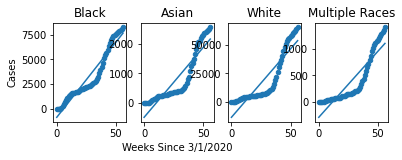

In [6]:
#Scatter plots for number of cases since March 1, 2020 by race in RI
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(2,4,1)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Black or African American', ax=ax)
plt.xlabel('')
plt.ylabel('Cases')
plt.title('Black')
m1, b1 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Black or African American'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m1*df_Race_rates['Weeks Since 3/1/2020'] + b1)

ax = fig.add_subplot(2,4,2)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Asian', ax=ax)
plt.xlabel('Weeks Since 3/1/2020')
plt.ylabel('')
plt.title('Asian')
m2, b2 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Asian'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m2*df_Race_rates['Weeks Since 3/1/2020'] + b2)

ax = fig.add_subplot(2,4,3)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='White', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('White')
m3, b3 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['White'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m3*df_Race_rates['Weeks Since 3/1/2020'] + b3)


ax = fig.add_subplot(2,4,4)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Multiple Races', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Multiple Races')
m4, b4 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Multiple Races'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m4*df_Race_rates['Weeks Since 3/1/2020'] + b4)


plt.show()



In [41]:
#Create functions based on linear regression
m1=int(b1)
b1=int(b1)
print('Enter a positive value for x (Weeks Since 3/1/2020):')
x = input()
x=int(x)


def Black_Rates(x, m1, b1):
  y=m1*x+b1
  return(y)


def Asian_Rates(x, m2, b2):
  y=m2*x+b2
  return(y)


def White_Rates(x, m3, b3):
  y=m3*x+b3
  return(y)


def Mult_Rates(x, m4, b4):
  y=m4*x+b4
  return(y)

Black_Rates(x, m1, b1)
Asian_Rates(x, m2, b2)
White_Rates(x, m3, b3)
Mult_Rates(x, m4, b4)


Enter a positive value for x (Weeks Since 3/1/2020):
70


1447.4851784633993

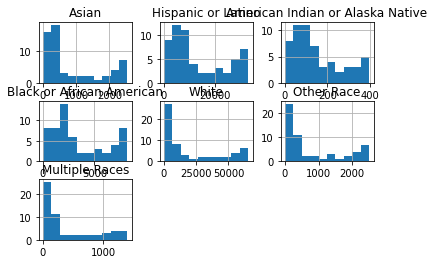

In [10]:
df_Race_rates_hist=df_Race_rates.drop(columns=['Weeks Since 3/1/2020'])

#create histogram of total cumulative cases by race since 3/1/2020 in RI
df_Race_rates_hist.hist()
plt.show()
 

In [11]:
#Correlation plot for vaccines administered and age group in RI
RI_Data_Demographics_Age=RI_Data_Demographics[0:12]
RI_Data_Demographics_Age=RI_Data_Demographics_Age.replace('<5', 0)
df = pd.DataFrame(RI_Data_Demographics_Age,columns=['Age Group', 'Total Vaccine Doses Administered'])
print(df)

corrMatrix = df.corr()
#plt.matshow(corrMatrix)

#plt.matshow(RI_Data_Demographics['Age Group', 'Total Vaccine Doses Administered'])

           Age Group Total Vaccine Doses Administered
Age Group        NaN                        N=579,428
0-4              NaN                                0
5-9              NaN                                0
10-14            NaN                                0
15-18            NaN                             2936
19-24            NaN                            20148
25-29            NaN                            22917
30-39            NaN                            52835
40-49            NaN                            57610
50-59            NaN                            84182
60-69            NaN                           149347
70-79            NaN                           121052


In [ ]:
!pip install plotly==4.14.3
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely

     |████████████████████████████████| 13.2MB 293kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 23.7MB 10.9MB/s 
     |████████████████████████████████| 1.0MB 11.4MB/s 
     |████████████████████████████████| 15.3MB 276kB/s 
     |████████████████████████████████| 6.5MB 45.6MB/s 
     |████████████████████████████████| 225kB 12.5MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=f55902274b4b6d4f479ab30bfa007c3b5cf07a54f4380099e76693d2d2467652
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [12]:
#Read in dataset Rhode Island Demographics
Download_Data4= drive.CreateFile({'id':'1a87E9gsZqLSa1pBEEBrlUsKtGUS5sTs1'})
Download_Data4.GetContentFile('COVID-19 Rhode Island Data - Municipal Rate Trends.csv')
RI_Data_Municipality_Rates=pd.read_csv('COVID-19 Rhode Island Data - Municipal Rate Trends.csv', skiprows=7, skip_blank_lines='true')


#Remove row with total population
RI_Data_Municipality_Rates.drop([0])


#Replace asteriks with 0
mydf1=RI_Data_Municipality_Rates.replace('*', 0)
mydf1=mydf1.replace(',', '')
mydf1=mydf1.drop([0])
mydf1.head()

#changed string to int to calculate cumsum
Barrington=np.cumsum(mydf1['BARRINGTON'].to_numpy(dtype=np.float32))
Bristol=np.cumsum(mydf1['BRISTOL'].to_numpy(dtype=np.float32))
Burrillville=np.cumsum(mydf1['BURRILLVILLE'].to_numpy(dtype=np.float32))
Central_falls=np.cumsum(mydf1['CENTRAL FALLS'].to_numpy(dtype=np.float32))
Charlestown=np.cumsum(mydf1['CHARLESTOWN'].to_numpy(dtype=np.float32))
Coventry=np.cumsum(mydf1['COVENTRY'].to_numpy(dtype=np.float32))
Cranston=np.cumsum(mydf1['CRANSTON'].to_numpy(dtype=np.float32))
Cumberland=np.cumsum(mydf1['CUMBERLAND'].to_numpy(dtype=np.float32))
East_Greenwich=np.cumsum(mydf1['EAST GREENWICH'].to_numpy(dtype=np.float32))
East_Providence=np.cumsum(mydf1['EAST PROVIDENCE'].to_numpy(dtype=np.float32))
Exeter=np.cumsum(mydf1['EXETER'].to_numpy(dtype=np.float32))
Foster=np.cumsum(mydf1['FOSTER'].to_numpy(dtype=np.float32))
Glocester=np.cumsum(mydf1['GLOCESTER'].to_numpy(dtype=np.float32))
Hopkinton=np.cumsum(mydf1['HOPKINTON'].to_numpy(dtype=np.float32))
Jamestown=np.cumsum(mydf1['JAMESTOWN'].to_numpy(dtype=np.float32))
Johnston=np.cumsum(mydf1['JOHNSTON'].to_numpy(dtype=np.float32))
Lincoln=np.cumsum(mydf1['LINCOLN'].to_numpy(dtype=np.float32))
Little_Compton=np.cumsum(mydf1['LITTLE COMPTON'].to_numpy(dtype=np.float32))
Middletown=np.cumsum(mydf1['MIDDLETOWN'].to_numpy(dtype=np.float32))
Narragansett=np.cumsum(mydf1['NARRAGANSETT'].to_numpy(dtype=np.float32))
New_Shoreham=np.cumsum(mydf1['NEW SHOREHAM'].to_numpy(dtype=np.float32))
Newport=np.cumsum(mydf1['NEWPORT'].to_numpy(dtype=np.float32))
North_Kingstown=np.cumsum(mydf1['NORTH KINGSTOWN'].to_numpy(dtype=np.float32))
North_Providence=np.cumsum(mydf1['NORTH PROVIDENCE'].to_numpy(dtype=np.float32))
North_Smithfield=np.cumsum(mydf1['NORTH SMITHFIELD'].to_numpy(dtype=np.float32))
Pawtucket=np.cumsum(mydf1['PAWTUCKET'].to_numpy(dtype=np.float32))
Portsmouth=np.cumsum(mydf1['PORTSMOUTH'].to_numpy(dtype=np.float32))
Providence=np.cumsum(mydf1['PROVIDENCE'].to_numpy(dtype=np.float32))
Richmond=np.cumsum(mydf1['RICHMOND'].to_numpy(dtype=np.float32))
Scituate=np.cumsum(mydf1['SCITUATE'].to_numpy(dtype=np.float32))
Smithfield=np.cumsum(mydf1['SMITHFIELD'].to_numpy(dtype=np.float32))
South_Kingstown=np.cumsum(mydf1['SOUTH KINGSTOWN'].to_numpy(dtype=np.float32))
Tiverton=np.cumsum(mydf1['TIVERTON'].to_numpy(dtype=np.float32))
Warren=np.cumsum(mydf1['WARREN'].to_numpy(dtype=np.float32))
Warwick=np.cumsum(mydf1['WARWICK'].to_numpy(dtype=np.float32))
West_Greenwich=np.cumsum(mydf1['WEST GREENWICH'].to_numpy(dtype=np.float32))
West_Warwick=np.cumsum(mydf1['WEST WARWICK'].to_numpy(dtype=np.float32))
Westerly=np.cumsum(mydf1['WESTERLY'].to_numpy(dtype=np.float32))
Woonsocket=np.cumsum(mydf1['WOONSOCKET'].to_numpy(dtype=np.float32))

#made a dataframe with cumulative covid cases in each town every week since 3/1/2020
Town_rates={'Barrington':Barrington, 'Bristol': Bristol, 'Burrillville': Burrillville, 'Central Falls':Central_falls, 'Charlestown':Charlestown, 'Coventry': Coventry, 'Cranston':Cranston, 'Cumberland':Cumberland, 'East Greenwich':East_Greenwich, 'East Providence':East_Providence, 'Exeter':Exeter, 'Foster':Foster, 'Glocester':Glocester, 'Hopkinton':Hopkinton, 'Jamestown':Jamestown, 'Johnston':Johnston, 'Lincoln':Lincoln, 'Little Compton':Little_Compton, 'Middletown':Middletown, 'Narragansett':Narragansett, 'New Shoreham':New_Shoreham, 'Newport':Newport, 'North Kingstown':North_Kingstown, 'North Providence':North_Providence, 'North Smithfield':North_Smithfield, 'Pawtucket':Pawtucket, 'Portsmouth':Portsmouth, 'Providence':Providence, 'Richmond':Richmond, 'Scituate':Scituate, 'Smithfield':Smithfield, 'South Kingstown':South_Kingstown, 'Tiverton':Tiverton, 'Warren':Warren, 'Warwick':Warwick, 'West Greenwich':West_Greenwich, 'West Warwick':West_Warwick, 'Westerly':Westerly,'Woonsocket':Woonsocket}
df_Town_rates = pd.DataFrame(Town_rates)





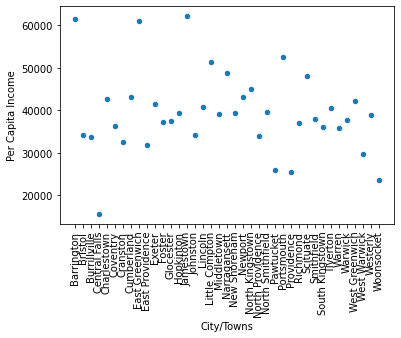

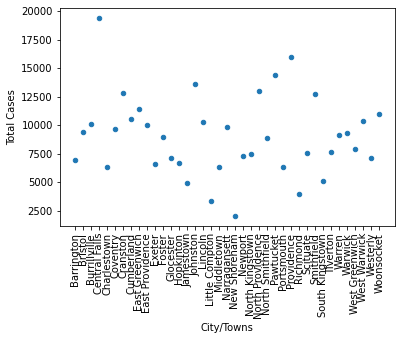

In [13]:
#Read in dataframe for RI Per Capita Income
Download_Data5= drive.CreateFile({'id':'1J0hidUHUx-zrwhzxWzS9LVqvJ5XCAg9L'})
Download_Data5.GetContentFile('RI_Towns_Income.xlsx')
RI_Income=pd.read_excel('RI_Towns_Income.xlsx')
RI_Income

#Add income data to covid data by town
df_Town_rates_t=df_Town_rates.T
Income=RI_Income['Per Capita Income'].to_list()
df_Town_rates_t.insert(0, "Per Capita Income", Income)
df_Town_rates_t.insert(0, "City/Towns", df_Town_rates_t.index)
df_Town_rates_t.insert(0, "Total Cases", df_Town_rates_t[df_Town_rates_t.columns[-1]].values)


#Rename the index
df_Town_rates_t=df_Town_rates_t.rename_axis('City/Towns')


Totals=df_Town_rates_t[df_Town_rates_t.columns[-1]].replace('\n','',regex=True)




#Correlation plot
#df_Town_rates_t.plot.scatter('City/Towns','Per Capita Income')
df_Town_rates_t.plot(kind='scatter',x='City/Towns', y='Per Capita Income', rot=90)
df_Town_rates_t.plot(kind='scatter',x='City/Towns', y='Total Cases', rot=90)



In [17]:
df_Town_rates_t

,Total Cases,City/Towns,Per Capita Income,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
City/Towns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barrington,6972.0,Barrington,61553,0.0,0.0,0.0,31.0,31.0,68.0,68.0,105.0,105.0,105.0,142.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,216.0,247.0,247.0,247.0,290.0,327.0,444.0,642.0,803.0,1081.0,1390.0,1681.0,2225.0,2707.0,2979.0,3529.0,3986.0,4555.0,5000.0,5389.0,5642.0,5784.0,5951.0,6087.0,6254.0,6415.0,6619.0,6749.0,6848.0,6972.0
Bristol,9385.0,Bristol,34268,0.0,0.0,0.0,0.0,27.0,72.0,121.0,175.0,220.0,269.0,296.0,341.0,377.0,377.0,377.0,377.0,377.0,377.0,408.0,448.0,479.0,501.0,528.0,550.0,617.0,648.0,648.0,693.0,729.0,729.0,769.0,823.0,931.0,1039.0,1205.0,1520.0,1961.0,2420.0,2649.0,3058.0,3454.0,3863.0,4434.0,5185.0,6040.0,6526.0,6994.0,7381.0,7718.0,7884.0,7987.0,8126.0,8315.0,8486.0,8688.0,9039.0,9385.0
Burrillville,10098.0,Burrillville,33662,0.0,0.0,0.0,0.0,36.0,121.0,182.0,243.0,304.0,304.0,304.0,353.0,353.0,353.0,353.0,353.0,353.0,353.0,353.0,353.0,353.0,396.0,396.0,396.0,396.0,396.0,396.0,445.0,500.0,543.0,573.0,622.0,731.0,846.0,1010.0,1144.0,1375.0,1734.0,2232.0,3283.0,3982.0,4687.0,5137.0,5897.0,6487.0,6998.0,7588.0,8105.0,8470.0,8628.0,8865.0,9078.0,9248.0,9430.0,9600.0,9843.0,10098.0
Central Falls,19369.0,Central Falls,15606,0.0,0.0,0.0,0.0,52.0,305.0,873.0,1750.0,2447.0,3087.0,3577.0,3907.0,4067.0,4211.0,4335.0,4438.0,4490.0,4526.0,4593.0,4712.0,4877.0,5068.0,5238.0,5408.0,5620.0,5728.0,5728.0,5821.0,5919.0,6094.0,6264.0,6496.0,6883.0,7409.0,8235.0,8988.0,10108.0,11114.0,11955.0,13064.0,13797.0,14390.0,14885.0,15669.0,16391.0,16974.0,17413.0,17857.0,18074.0,18249.0,18466.0,18672.0,18791.0,18935.0,19002.0,19188.0,19369.0
Charlestown,6312.0,Charlestown,42612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,154.0,218.0,359.0,539.0,822.0,1182.0,1645.0,2108.0,2532.0,2892.0,3560.0,3933.0,4216.0,4473.0,4692.0,4911.0,5091.0,5258.0,5438.0,5605.0,5849.0,6016.0,6235.0,6312.0
Coventry,9644.0,Coventry,36257,0.0,0.0,0.0,14.0,46.0,113.0,162.0,214.0,246.0,284.0,319.0,368.0,397.0,397.0,397.0,397.0,397.0,423.0,449.0,466.0,489.0,509.0,532.0,549.0,575.0,601.0,601.0,615.0,676.0,693.0,731.0,789.0,879.0,1038.0,1180.0,1466.0,1900.0,2499.0,3075.0,3888.0,4536.0,5146.0,5508.0,5977.0,6587.0,7050.0,7579.0,7909.0,8158.0,8375.0,8534.0,8676.0,8835.0,9011.0,9187.0,9427.0,9644.0
Cranston,12864.0,Cranston,32634,0.0,0.0,0.0,33.0,83.0,214.0,384.0,542.0,674.0,773.0,864.0,956.0,1015.0,1059.0,1097.0,1120.0,1137.0,1181.0,1213.0,1260.0,1313.0,1400.0,1508.0,1551.0,1611.0,1659.0,1707.0,1746.0,1790.0,1842.0,1923.0,2041.0,2206.0,2479.0,2807.0,3281.0,3973.0,4771.0,5397.0,6332.0,7179.0,7766.0,8219.0,8826.0,9513.0,9987.0,10424.0,10768.0,11045.0,11264.0,11455.0,11653.0,11886.0,12132.0,12330.0,12608.0,12864.0
Cumberland,10547.0,Cumberland,43193,0.0,0.0,0.0,17.0,63.0,184.0,262.0,366.0,418.0,476.0,505.0,537.0,551.0,583.0,609.0,609.0,635.0,635.0,635.0,670.0,699.0,728.0,754.0,797.0,858.0,893.0,931.0,1018.0,1061.0,1099.0,1162.0,1249.0,1376.0,1546.0,1771.0,2008.0,2380.0,2778.0,3182.0,3984.0,4769.0,5335.0,5736.0,6394.0,7052.0,7621.0,8060.0,8481.0,8758.0,9041.0,9220.0,9431.0,9601.0,9875.0,10060.0,10279.0,10547.0
East Greenwich,11458.0,East Greenwich,60930,0.0,0.0,0.0,0.0,38.0,130.0,168.0,260.0,336.0,390.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,490.0,490.0,536.0,590.0,590.0,636.0,697.0,751.0,751.0,751.0,751.0,751.0,835.0,896.0,988.0,1271.0,1516.0,1921.0,2441.0,3061.0,3574.0,4285.0,4996.0,5562.0,5906.0,6571.0,7458.0,8192.0,8773.0,9263.0,9531.0,9799.0,10059.0,10357.0,10525.0,10678.0,10862.0,11160.0,11458.0


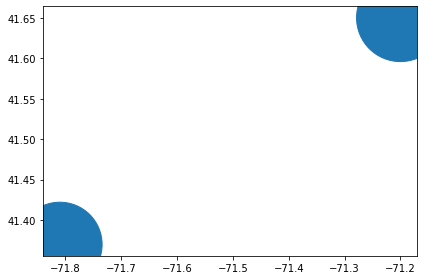

In [37]:
#Read in dataframe for RI Per Capita Income
Download_Data5= drive.CreateFile({'id':'1KG_Zvk2FM7UREsJVrCCDLRUu5TvVn5G4'})
Download_Data5.GetContentFile('RI_Lat_Long.xlsx')
RI_Lat_Long=pd.read_excel('RI_Lat_Long.xlsx')
RI_Lat_Long

TOWNS=df_Town_rates_t.reset_index(drop=True)

RI=pd.merge(RI_Lat_Long, TOWNS, on='City/Towns')

lat, lon = RI['Latitude'], RI['Longitude']
cases=RI['Total Cases']


fig=plt.scatter(lon, lat, label=None, s=cases)
plt.tight_layout()

#plt.axes(axes.set(xlim(xmin,xmax), ylim(ymin,ymax)))



plt.show()





Check to see if really need the averages, or how to visually display- maybe box and wisker

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


       Asian  Black or African American        White  Multiple Races
1  44.614037                 144.070175  1147.736816       24.561403
F statistic = 40.598 and probability p = 0.000
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------------
                    Asian Black or African American   99.4561 0.8205 -211.2876  410.1999  False
                    Asian            Multiple Races  -20.0526    0.9 -330.7963  290.6911  False
                    Asian                     White 1103.1228  0.001  792.3791 1413.8665   True
Black or African American            Multiple Races -119.5088 0.7269 -430.2525  191.2349  False
Black or African American                     White 1003.6667  0.001   692.923 1314.4104   True
           Multiple Races                     W

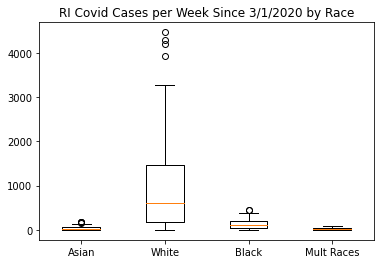

In [15]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

#Find average number of cases by race
Asian_av=[np.mean(mydf['Asian'].to_numpy(dtype=np.float32))]
Black_av=[np.mean(mydf['Black or African American'].to_numpy(dtype=np.float32))]
Mult_av=[np.mean(mydf['Multiple race'].to_numpy(dtype=np.float32))]
White_av=[np.mean(mydf['White'].to_numpy(dtype=np.float32))]

#Create new dataset with average number of cases per week since March 1, 2020
Race_av={'Asian':Asian_av, 'Black or African American':Black_av, 'White':White_av, 'Multiple Races':Mult_av}
df_Race_av = pd.DataFrame(Race_av, index=[1])
print(df_Race_av)

Asian1=mydf['Asian'].to_numpy(dtype=np.float32)
White1=mydf['White'].to_numpy(dtype=np.float32)
Black1=mydf['Black or African American'].to_numpy(dtype=np.float32)
Mult1=mydf['Multiple race'].to_numpy(dtype=np.float32)

myindex=['Week {}'.format(k) for k in range (57)]
Race={'Index':myindex, 'Asian':Asian1, 'White':White1, 'Black or African American':Black1, 'Multiple Races':Mult1}
df_Race=pd.DataFrame(Race).set_index('Index')


#ANOVA to determine if there is a statistical difference between the number of cases each week since 3/1/2020 by race in RI
F,p=scipy.stats.f_oneway(White1, Black1, Mult1, Asian1)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

#convert dataframe to two columns
stacked_data = df_Race.stack().reset_index() 
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
print(type(stacked_data['result']))
MultiComp = MultiComparison(stacked_data['result'].to_numpy(dtype=np.float64), stacked_data['treatment'])
print(MultiComp.tukeyhsd().summary())


#Create boxplot for COVID cases by race
Asian3=pd.to_numeric(df_Race['Asian'])
White3=pd.to_numeric(df_Race['White'])
Black3=pd.to_numeric(df_Race['Black or African American'])
Mult3=pd.to_numeric(df_Race['Multiple Races'])

#White3=df_Race['White'].to_numeric()
#Black3=df_Race['Black or African American'].to_numeric()
#Mult3=df_Race['Multiple Races'].to_numeric()


plt.boxplot([Asian1, White1, Black1, Mult1])
x=[1, 2, 3, 4]
labels=['Asian', 'White', 'Black', 'Mult Races']
plt.xticks(x, labels)
plt.title('RI Covid Cases per Week Since 3/1/2020 by Race')

plt.show()


After running a one-way Anova, there is sufficient evidence to conclude that there are significant differences in the number of covid cases in RI since 3/1/2020 by race. Further tests indicate that there are significant differences between Asian and White groups, Black or African American and White groups, and Multiple Races and White groups. This suggests individuals identifying as white were more likely to contract covid. However, further tests would be needed to look at the distribution based on demographics.


Demographics of RI:
White: 80.46%
Black or African American: 6.77%
Other race: 5.47%
Asian: 3.40%
Two or more races: 3.33%
Native American: 0.50%
Native Hawaiian or Pacific Islander: 0.08%

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                    group2          meandiff p-adj   lower     upper   reject
---------------------------------------------------------------------------------------------
                    Asian Black or African American   8.2367   0.9 -240.5223  256.9957  False
                    Asian            Multiple Races   -0.699   0.9  -249.458    248.06  False
                    Asian                     White 921.9522 0.001  673.1932 1170.7112   True
Black or African American            Multiple Races  -8.9357   0.9 -257.6946  239.8233  False
Black or African American                     White 913.7155 0.001  664.9565 1162.4745   True
           Multiple Races                     White 922.6512 0.001  673.8922 1171.4101   True
---------------------------------------------------------------------------------------------
F statistic = 40.598 and probability p = 0.000


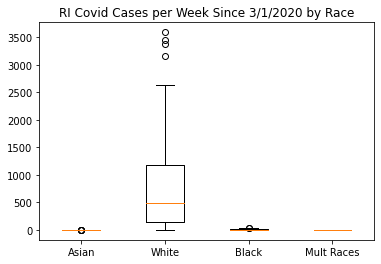

In [16]:
#Create new dataset with average number of cases per week since March 1, 2020 by population demographics
myindex1=['Week {}'.format(k) for k in range (57)]
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

#multiply each variable by Rhode Island Demographics (based on American Community Survey)
Asian2=mydf['Asian'].to_numpy(dtype=np.float64)*.034
White2=mydf['White'].to_numpy(dtype=np.float64)*.8046
Black2=mydf['Black or African American'].to_numpy(dtype=np.float64)*.0677
Mult2=mydf['Multiple race'].to_numpy(dtype=np.float64)*.0333


Race1={'Index':myindex1, 'Asian':Asian2, 'White':White2, 'Black or African American':Black2, 'Multiple Races':Mult2}
df_Race_demo=pd.DataFrame(Race1).set_index('Index')

#convert dataframe to two columns
stacked_data1 = df_Race_demo.stack().reset_index() 
stacked_data1 = stacked_data1.rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
#print(type(stacked_data['result']))
MultiComp1 = MultiComparison(stacked_data1['result'].to_numpy(dtype=np.float64), stacked_data1['treatment'])
print(MultiComp1.tukeyhsd().summary())


#ANOVA to determine if there is a statistical difference between the number of cases each week since 3/1/2020 by race in RI
F,p=scipy.stats.f_oneway(White1, Black1, Mult1, Asian1)
#F,p=scipy.stats.f_oneway(White, Black_or_African_American, Multiple_race, Asian)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 



plt.boxplot([Asian2, White2, Black2, Mult2])
x=[1, 2, 3, 4]
labels=['Asian', 'White', 'Black', 'Mult Races']
plt.xticks(x, labels)
plt.title('RI Covid Cases per Week Since 3/1/2020 by Race')

plt.show()

After running a one-way Anova, there is sufficient evidence to conclude that there are significant differences in the number of covid cases in RI since 3/1/2020 by race (corrected for % of population). Further tests indicate that there are significant differences between Asian and White groups, Black or African American and White groups, and Multiple Races and White groups. This suggests individuals identifying as white were more likely to contract covid. However, further tests would be needed to look at the distribution based on demographics.